## Sampling Distribution :

In inferential statistics, we want to use characteristics of the sample (i.e. a statistic) to estimate the characteristics of the population (i.e. a parameter).

One uses the sample mean (the statistic) to estimate the population mean (the parameter) and the sample proportion (the statistic) to estimate the population proportion (the parameter). In doing so, we need to know the properties of the sample mean or the sample proportion. That is why we need to study the sampling distribution of the statistics.

We will begin with the sampling distribution of the sample mean.  Since the sample statistic is a single value that estimates a population paramater, we refer to the statistic as a point estimate.

* Parameters , the summary measures of population e.g. mean and SD are fixed. 
* Statistics , the summary measures of a sample  e.g. sample mean and sample SD, vary. 

Think about taking a sample and the sample isn’t always the same therefore the statistics change.  Due to this sampling variation the sample statistics themselves have a distribution that can be described by some measure of central tendency and spread.

### Sampling Distribution of the Sample Mean

Example : A large tank of fish from a hatchery is being delivered to the lake. We want to know the average length of the fish in the tank. Instead of measuring all the fish, we randomly sample some of them and use the sample mean to estimate the population mean.

if one does the experiment over and over again, the overall average of the sample mean is exactly the population mean.

In [26]:
%matplotlib inline

/home/abhay/.virtualenvs/Data_Scinece/local/lib/python3.5/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/abhay/.virtualenvs/Data_Scinece/local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Population Mean = 0, Population Std = 1')

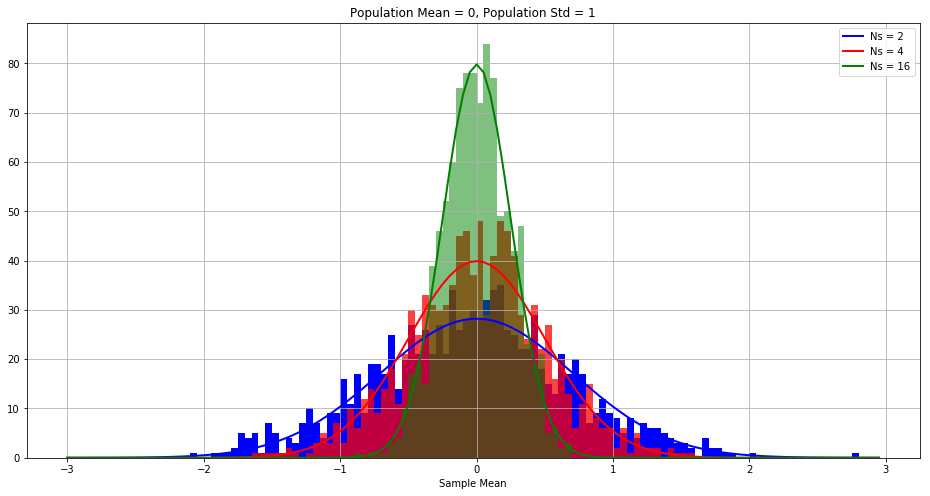

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
 
#=======================================================
#Parameters
#=======================================================
#Population Params
mu = 0
sig = 1
 
#Sample Parameters
numSamplesVec = [2, 4, 16]
colorVec = ['blue', 'red', 'green']
alphaVec = [1.0, .75, .5]
 
Nmc = 1000
 
plt.close('all')
plt.figure(figsize=(16,8))
bins = np.arange(-3,3, .05) #<-- histogram bins
 
for Ns, col, alp in zip(numSamplesVec, colorVec, alphaVec):
 
    #Initialize vectors for all the parameters of interest
    sampleStd = sig/np.sqrt(Ns)
    muSample = np.zeros(Nmc)
    sigSample = np.zeros(Nmc)
    stdErr = np.zeros(Nmc)
    tStat = np.zeros(Nmc)
 
    #Monte Carlo sim of many samples with size Ns
    for k in range(0,Nmc):
        x = sig*np.random.randn(Ns)+mu
        muSample[k] = np.mean(x)
        sigSample[k] = np.std(x)
        stdErr[k] = sigSample[k]/np.sqrt(Ns)
        tStat[k] = muSample[k]/stdErr[k] #<-- t-test for 0-mean. Is the mean significantly different 0?
 
    #Histogram and plotting of sample mean
    n,muBins, p = plt.hist(muSample, bins, color=col, alpha=alp )
    dmu = muBins[1]-muBins[0]
    y = mlab.normpdf(muBins, mu, sampleStd)
    plt.plot(muBins, dmu*Nmc*y, color=col,linewidth=2)
 
#Finishing up the plot with legend and labels
plt.grid('on')
plt.xlabel('Sample Mean')
legendList = list()
for Ns in numSamplesVec:
    legendList.append('Ns = ' + str(Ns))
plt.legend(legendList)
plt.title('Population Mean = 0, Population Std = 1')

* The variance of the sample mean is less when you have more samples. 
* The distribution is narrower around the true mean (zero in this case). 

### Sampling Distribution - Central Limit Theorem

The Central Limit Theorem states:

For a large sample size (rule of thumb: n ≥ 30), 

x¯ is approximately normally distributed, regardless of the distribution of the population one samples from. If the population has mean μ and standard deviation σ, then x¯ has mean μ and standard error σ/√n.


Note : 
    
* If the population is skewed, then the sample mean won't be normal for when N is small. (When doing simulation, one replicates the process many times.) Using 10,000 replications is a good idea.
* If the population is normal, then the distribution of sample mean looks normal even if N = 2.
* If the population is skewed, then the distribution of sample mean looks more and more normal when N gets larger.
* Note that in all cases, the mean of sample mean is close to the population mean and the standard deviation of the sample mean is close to σ/√N known as standard error.

3.987793504974584


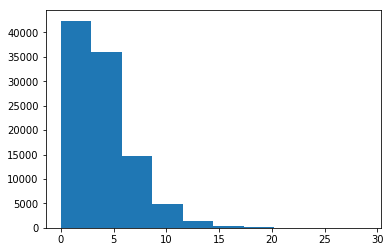

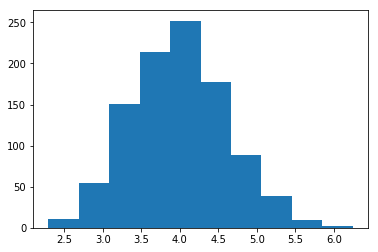

In [30]:

import numpy as np
import random



shape, scale = 2., 2.  
s = np.random.gamma(shape, scale, 100000)
print(np.mean(s))
import matplotlib.pyplot as plt
import scipy.special as sps
plt.hist(s)
plt.show()




# The distribution of the means from the sampled groups is normally distributed
samples = [ np.mean(random.sample(list(s), k=20)) for _ in range(1000) ]

samples
plt.hist(samples)
plt.show()

### Example:  Speedboat Engines

The engines made by Ford for speedboats had an average power of 220 horsepower (HP) and standard deviation of 15 HP.

1. A potential buyer intends to take a sample of four engines and will not place an order if the sample mean is less than 215 HP. What is the probability that the buyer will not place an order?

We want to find P(x¯ < 215) = ?

Answer: We need to know whether the distribution of the population is normal since the sample size is too small: n = 4 (less than 30 which is required in the central limit theorem). If someone confirms that the population normal, then we can proceed since the sampling distribution of the mean of a normal distribution is also normal for all sample sizes.

If the population follows a normal distribution, we can conclude that x¯ has a normal distribution with mean 220 HP and a standard error of σ/√n=15/√4=7.5HP

P(x¯ < 215)
= P(Z < (215 - 220) / 7.5)
= P(Z < -0.67)
= 0.2514

If the customer just samples four engines, the probability that the customer will not place an order is 25.14%.

#### [ASSIGNMENT] 

If the customer samples 50 engines, what is the probability that the sample mean will be less than 205?  

Try to figure out your answer first, then click the graphic to compare answers.